In [1]:
import numpy
from scipy import linalg, special
from scipy.integrate import solve_ivp
import matplotlib
from matplotlib import pyplot

from tqdm.notebook import tqdm

import joblib

from bmme import *

  0%|          | 0/501 [00:00<?, ?it/s]

C:\Users\priva\AppData\Local\Temp\ipykernel_4020\4217604491.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  currents[i] = local_currents[0] + local_currents[1], local_currents[2] + local_currents[3]


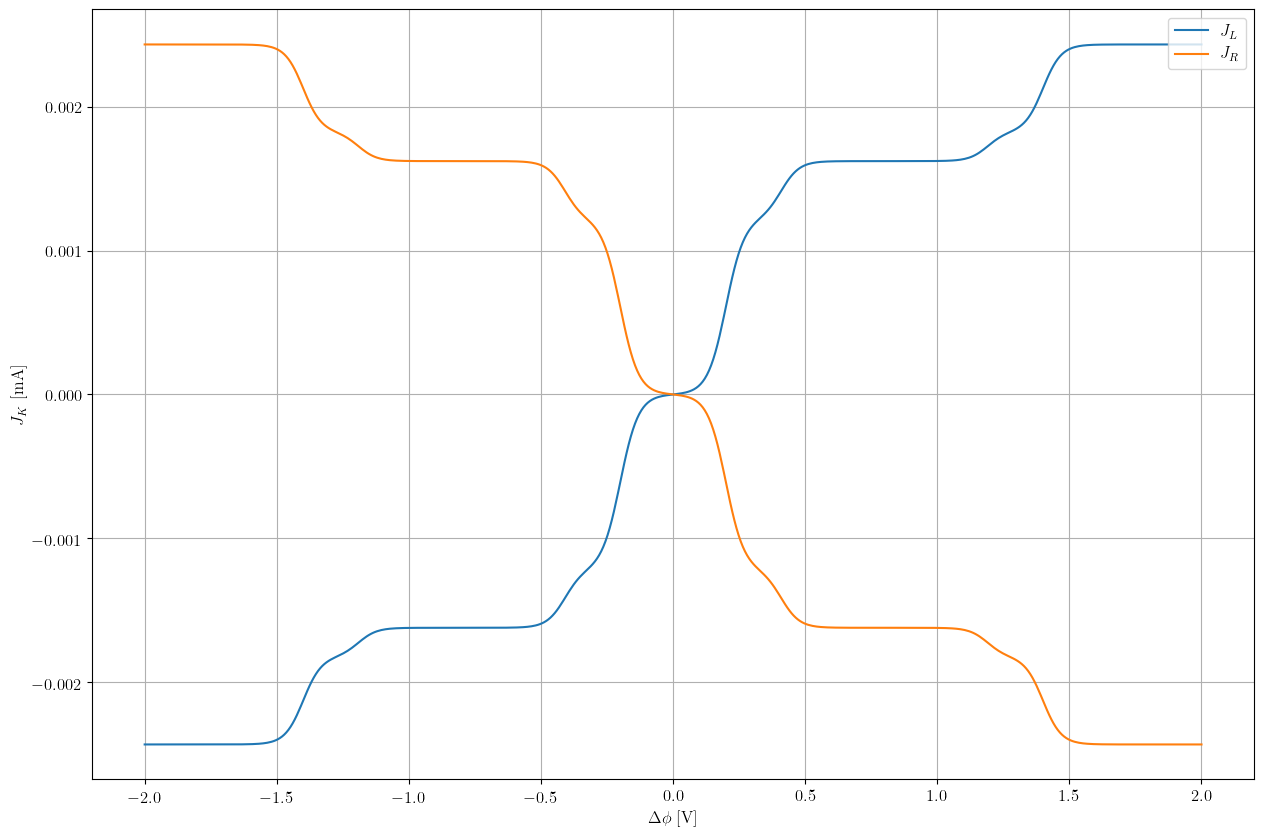

In [10]:
e_up = 0.1 # eV
e_down = 0.2 # eV
U = 0.5 # eV
Gamma = 0.01 # eV
T = 0.026 / 3 * 2 # eV
voltages = numpy.linspace(-2., 2., 501)

currents = numpy.zeros((len(voltages), 2))

d_ops, d_dags = generate_fermionic_ops(2)
d_op_up = d_ops[0]
d_op_down = d_ops[1]
d_dag_up = d_dags[0]
d_dag_down = d_dags[1]
H_S = e_up * d_dag_up @ d_op_up + e_down * d_dag_down @ d_op_down + U * d_dag_up @ d_op_up @ d_dag_down @ d_op_down
Gammas = numpy.zeros((2,2,4))
Gammas[0,0] = [Gamma, 0, Gamma, 0]
Gammas[1,1] = [0, Gamma, 0, Gamma]
solver = BornMarkovSolver(H_S, [d_op_up, d_op_down], [], Gammas, numpy.array([0] * 4), numpy.array([T] * 4))

for i, voltage in enumerate(tqdm(voltages)):
    solver.chemical_potential = numpy.array([-.5 * voltage, -.5 * voltage, .5 * voltage, .5 * voltage])
    solver.construct_liouvillian()
    rho_ss = solver.find_steady_state()
    local_currents = solver.get_currents(rho_ss)
    currents[i] = local_currents[0] + local_currents[1], local_currents[2] + local_currents[3]
    
pyplot.figure(figsize=(15,10))
pyplot.plot(voltages, currents[:,0], label="$J_L$")
pyplot.plot(voltages, currents[:,1], label="$J_R$")

pyplot.grid()
pyplot.legend(loc=1)
pyplot.xlabel("$\\Delta\\phi$ [V]")
pyplot.ylabel("$J_K$ [mA]")
#pyplot.savefig("anderson_currents.pdf")
pyplot.show()

numpy.save("data/anderson/AN_200K", currents)

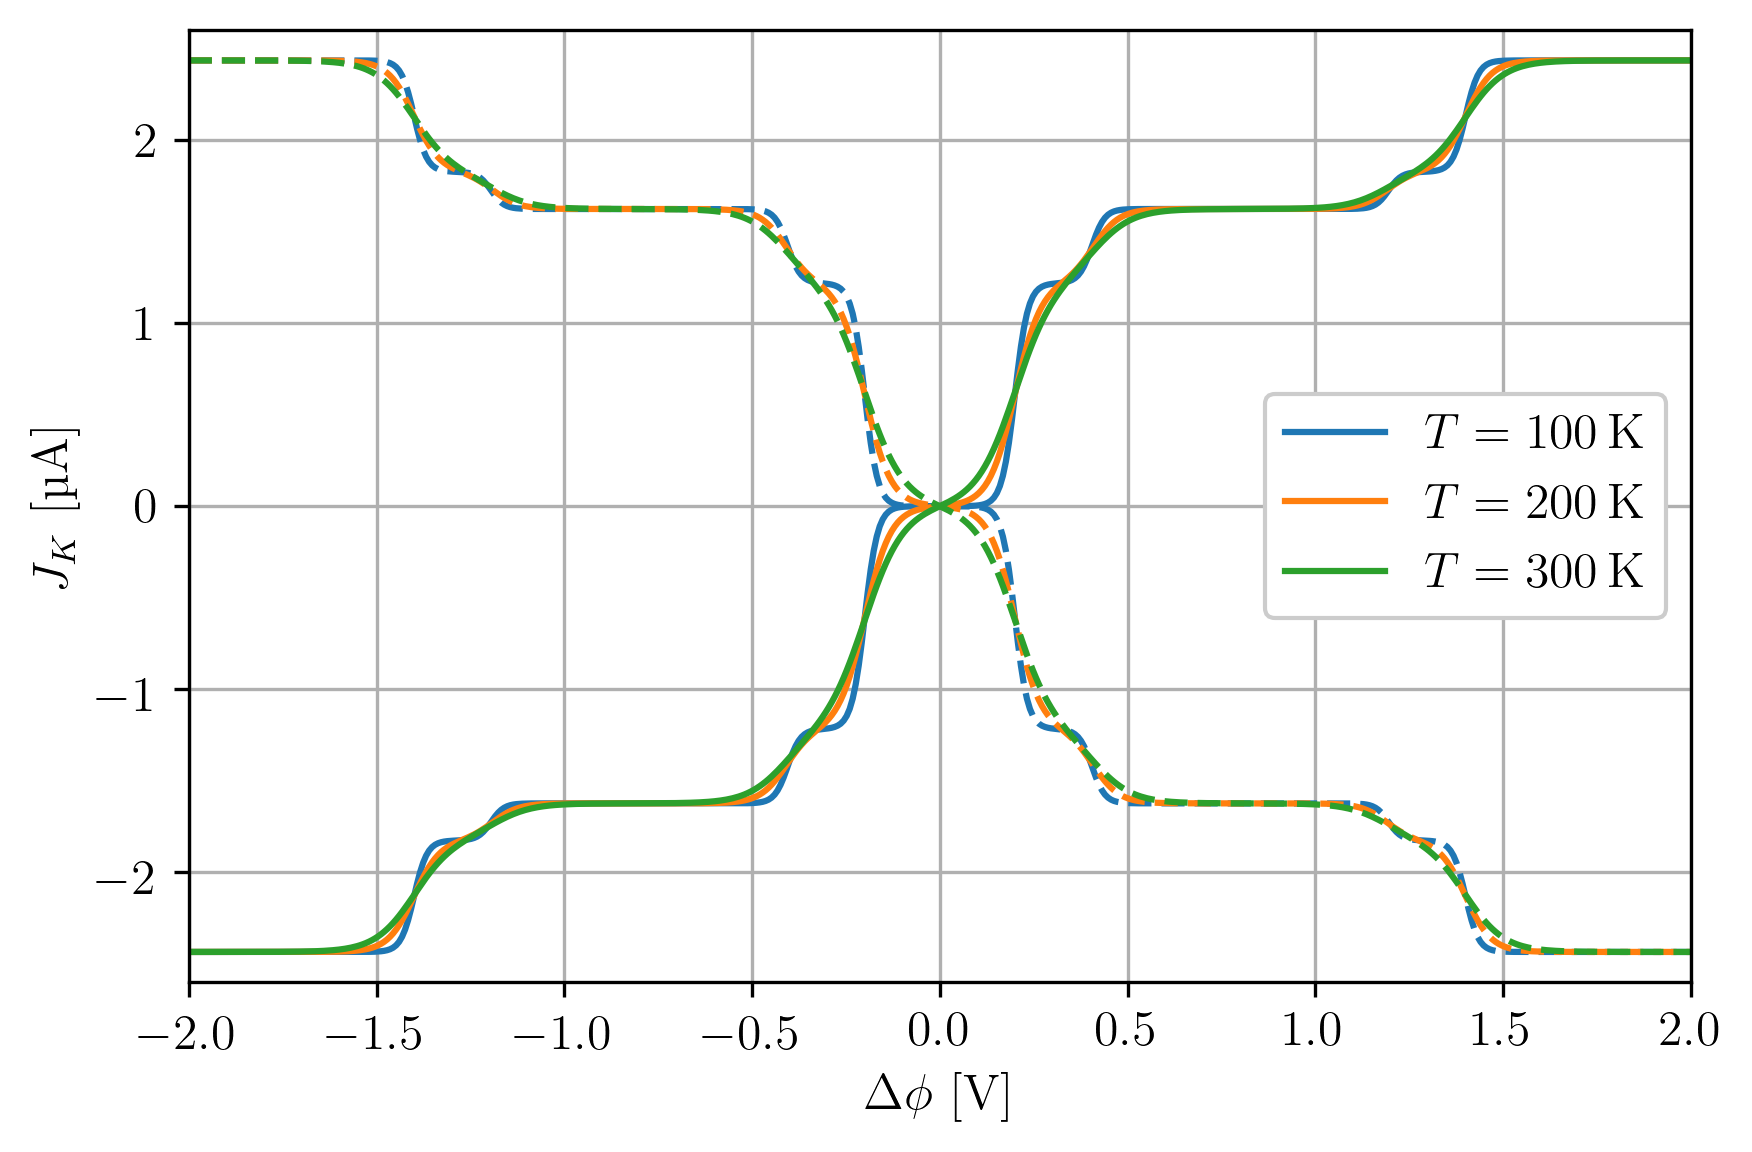

In [15]:
pyplot.figure(figsize=(6,4), tight_layout=True)
voltages = numpy.linspace(-2.0, 2.0, 501)
pyplot.plot(voltages, 1e3*numpy.load("data/anderson/AN_100K.npy")[:,0], label="$T=100\\,\\mathrm{K}$", c="tab:blue") 
pyplot.plot(voltages, 1e3*numpy.load("data/anderson/AN_100K.npy")[:,1], c="tab:blue", ls="--")
pyplot.plot(voltages, 1e3*numpy.load("data/anderson/AN_200K.npy")[:,0], label="$T=200\\,\\mathrm{K}$", c="tab:orange")
pyplot.plot(voltages, 1e3*numpy.load("data/anderson/AN_200K.npy")[:,1], c="tab:orange", ls="--")
pyplot.plot(voltages, 1e3*numpy.load("data/anderson/AN_300K.npy")[:,0], label="$T=300\\,\\mathrm{K}$", c="tab:green")
pyplot.plot(voltages, 1e3*numpy.load("data/anderson/AN_300K.npy")[:,1], c="tab:green", ls="--")
pyplot.grid()
pyplot.legend(loc=5, framealpha=1.)
pyplot.xlabel("$\\Delta\\phi$ [V]")
pyplot.ylabel("$J_K$ [µA]")
pyplot.xlim(-2.0, 2.0)
pyplot.ylim(-2.6, 2.6)
pyplot.savefig("anderson_currents.pdf")
pyplot.gcf().set_dpi(300)
pyplot.show()